# Processamento dos Dados

In [175]:
%run ../services/imports.py
%run ../services/visualization.py
import services.lista_estados_regioes as lesr

In [176]:
# Criar instância da classe
visualizacao = Visualizacao()

## POSCOMP

### Dados da Homologação do POSCOMP

In [314]:
dados_homologados = pd.read_csv('../dados/homologacao_poscomp/dataset_poscomp.csv')

In [178]:
dados_homologados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INSCRICAO   14575 non-null  object
 1   NOME        14575 non-null  object
 2   DATA NASC.  14575 non-null  object
 3   SEXO        14575 non-null  object
 4   ESTADO      14575 non-null  object
 5   ANO         14575 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 683.3+ KB


In [179]:
dados_homologados['ANO'] = dados_homologados['ANO'].astype('object')

In [180]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

In [181]:
qtd_sexo = dados_homologados.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')
qtd_sexo['SEXO'] = qtd_sexo['SEXO'].replace({'F': 'Feminino',
                                             'M': 'Masculino'})

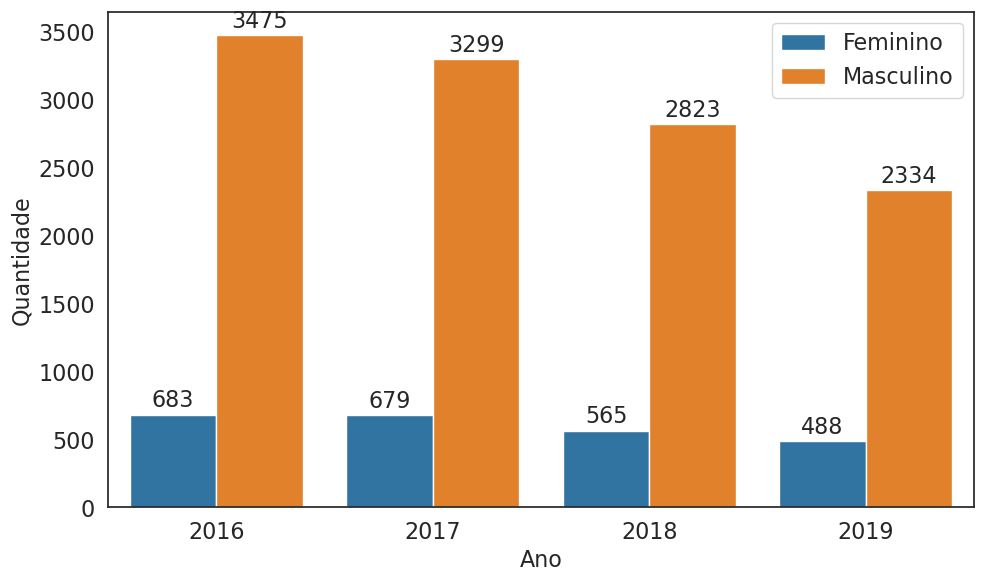

In [315]:
visualizacao.barplot_view(qtd_sexo, x='ANO', y='counts', hue='SEXO', fontsize=16, xlabel='Ano',
                          ylabel='Quantidade', figsize=(10, 6), save_path='../imagens/qtd_candidatosAno.png')

In [183]:
dados_homologados = dados_homologados.drop(columns=['ANO'])

In [199]:
dados_homologados[dados_homologados['INSCRICAO'] == 'miamia']

,INSCRICAO,NOME,DATA NASC.,SEXO,ESTADO
13264,miamia,KEVEN DO NASCIMENTO CARNEIRO,28/08/1995,M,Fortaleza


In [260]:
dados_homologados.shape

(14344, 5)

In [202]:
dados_homologados.drop([11808, 13264], inplace=True, axis=0)

In [259]:
dados_homologados.shape

(14344, 5)

### Dados das Notas do POSCOMP

In [265]:
dados_notasRespostas = pd.read_csv('../dados/notas_poscomp/dados_notasRespostas.csv')

In [266]:
dados_notasRespostas = dados_notasRespostas.drop_duplicates(subset='INSCRICAO', keep='first', ignore_index=True)

In [274]:
data_poscomp.columns = [coluna.lower() for coluna in data_poscomp.columns]

In [312]:
data_poscomp[data_poscomp['nome'] == 'ARTHUR SENA LINS CALDAS']

,inscricao,nome,data nasc.,sexo,estado,especialidade,presente dia1,cargo,matemática discreta,cálculo diferencial e integral,...,redes de computadores,computação gráfica,inteligência artificial,engenharia de software,sistemas distribuídos,compiladores,processamento de imagens,banco de dados,ano,regiao
421,39401650622-1,ARTHUR SENA LINS CALDAS,07/04/1992,M,PB,SISTEMAS DE COMPUTAÇÃO,S,Mestrado/Doutorado,1.0,0.0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2016,nordeste
4579,42101810511-8,ARTHUR SENA LINS CALDAS,07/04/1992,M,PB,Engenharia de Software,S,Mestrado/Doutorado,2.0,2.0,...,2.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2017,nordeste
8446,47101160622-0,ARTHUR SENA LINS CALDAS,07/04/1992,M,PB,Engenharia de software,S,Mestrado/Doutorado,1.0,1.0,...,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2018,nordeste
11771,51801354687-9,ARTHUR SENA LINS CALDAS,07/04/1992,M,PB,Modelos Computacionais e Cognitivos,S,Mestrado/Doutorado,1.0,1.0,...,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,2019,nordeste


In [313]:
data_poscomp['nome'].duplicated().sum()

2313

In [275]:
qtd_cargo = data_poscomp.groupby(['cargo']).size().reset_index(name='counts')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


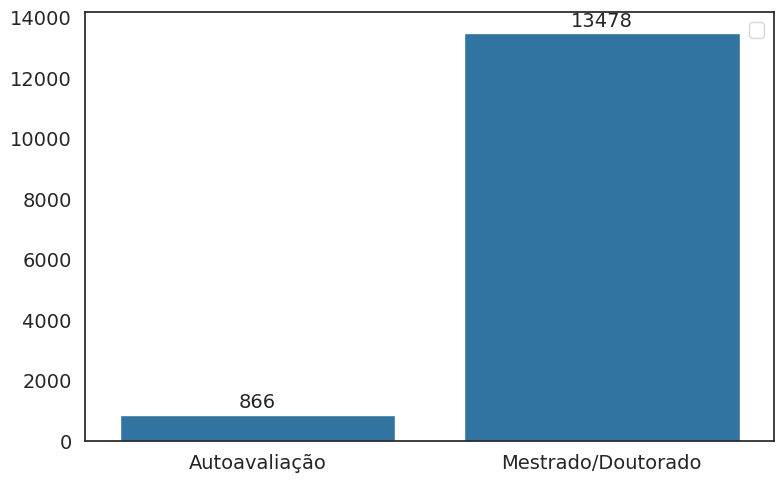

In [276]:
visualizacao.barplot_view(qtd_cargo, x='cargo', y='counts')

In [277]:
group_qtd_sex = data_poscomp.groupby(['presente dia1', 'ano']).size().reset_index(name='counts')

In [278]:
group_qtd_sex['presente dia1'] = group_qtd_sex['presente dia1'].replace({'N':'Ausentes',
                                        'S':'Presentes'})

In [279]:
group_qtd_sex.rename(columns={'presente dia1': 'presente'}, inplace=True)

In [280]:
group_qtd_sex

,presente,ano,counts
0,Ausentes,2016,837
1,Ausentes,2017,636
2,Ausentes,2018,686
3,Ausentes,2019,546
4,Presentes,2016,3321
5,Presentes,2017,3342
6,Presentes,2018,2702
7,Presentes,2019,2274


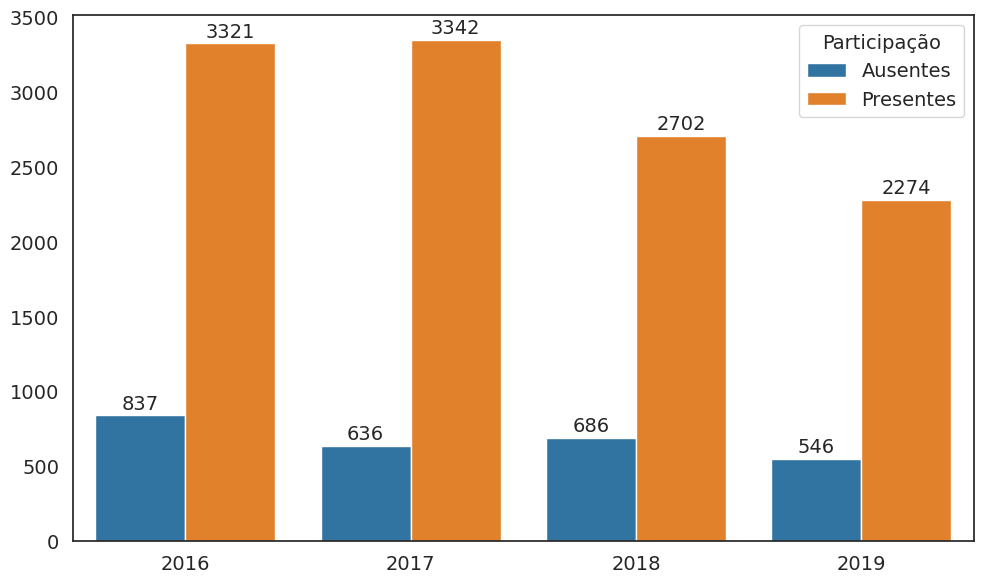

In [281]:
visualizacao.barplot_view(dataframe=group_qtd_sex, x='ano', y='counts', hue='presente', title_legend='Participação', figsize=(10,6),
                         save_path='../imagens/faltantes_presentes.pdf')

### Realizar estudos por Regiões do Brasil

In [282]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    data_poscomp.loc[data_poscomp['estado'].isin(lesr.regioes_brasil_siglas[i]), 'regiao'] = i

In [283]:
dados_homologados_cp = data_poscomp.copy()

In [284]:
dados_homologados_cp.shape

(14344, 35)

In [285]:
dados_homologados_cp = dados_homologados_cp.dropna() # excluir candidatos inscritos em autovaliação

In [286]:
dados_homologados_cp['regiao'].value_counts()

regiao
sudeste         4206
sul             2503
nordeste        2470
centro_oeste    1099
norte            699
Name: count, dtype: int64

In [287]:
qtd_regiao = dados_homologados_cp.groupby(['regiao']).size().reset_index(name='counts')

In [288]:
porcentagem = qtd_regiao['counts'].to_numpy()
porcentagem = 100 * porcentagem/porcentagem.sum()
porcentagem

array([10.01184294, 22.50159424,  6.36786007, 38.31647991, 22.80222283])

In [289]:
qtd_regiao['Porcentagem regiao'] = porcentagem
qtd_regiao

,regiao,counts,Porcentagem regiao
0,centro_oeste,1099,10.011843
1,nordeste,2470,22.501594
2,norte,699,6.367860
3,sudeste,4206,38.316480
4,sul,2503,22.802223


In [290]:
qtd_regiao.style.format({'Porcentagem regiao':'{:.2f}%'})

,regiao,counts,Porcentagem regiao
0,centro_oeste,1099,10.01%
1,nordeste,2470,22.50%
2,norte,699,6.37%
3,sudeste,4206,38.32%
4,sul,2503,22.80%


In [291]:
regioes = {
    'norte': 'Norte',
    'nordeste': 'Nordeste',
    'centro_oeste': 'Centro-Oeste',
    'sudeste': 'Sudeste',
    'sul': 'Sul'
}

In [292]:
qtd_regiao_ano = dados_homologados_cp.groupby(['regiao', 'ano']).size().reset_index(name='counts')
qtd_regiao_ano['regiao'] = qtd_regiao_ano['regiao'].replace(regioes)

In [293]:
qtd_regiao_estado = dados_homologados_cp.groupby(['regiao', 'estado']).size().reset_index(name='counts')
qtd_regiao_estado['regiao'] = qtd_regiao_estado['regiao'].replace(regioes)

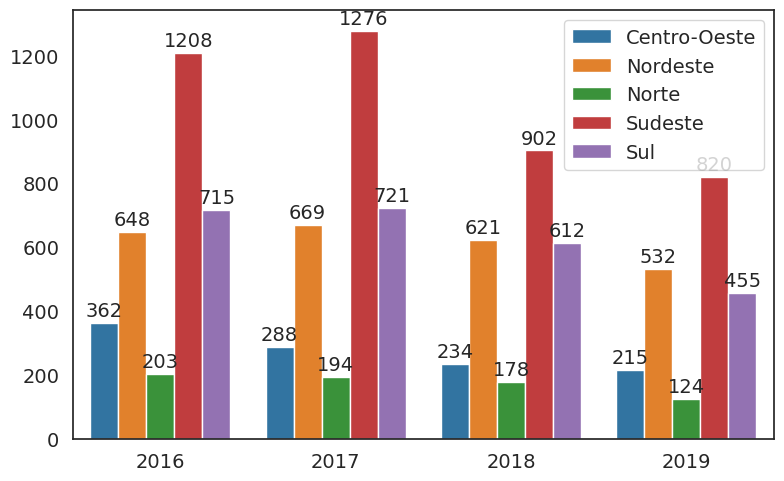

In [294]:
visualizacao.barplot_view(qtd_regiao_ano, x='ano', y='counts', hue='regiao')

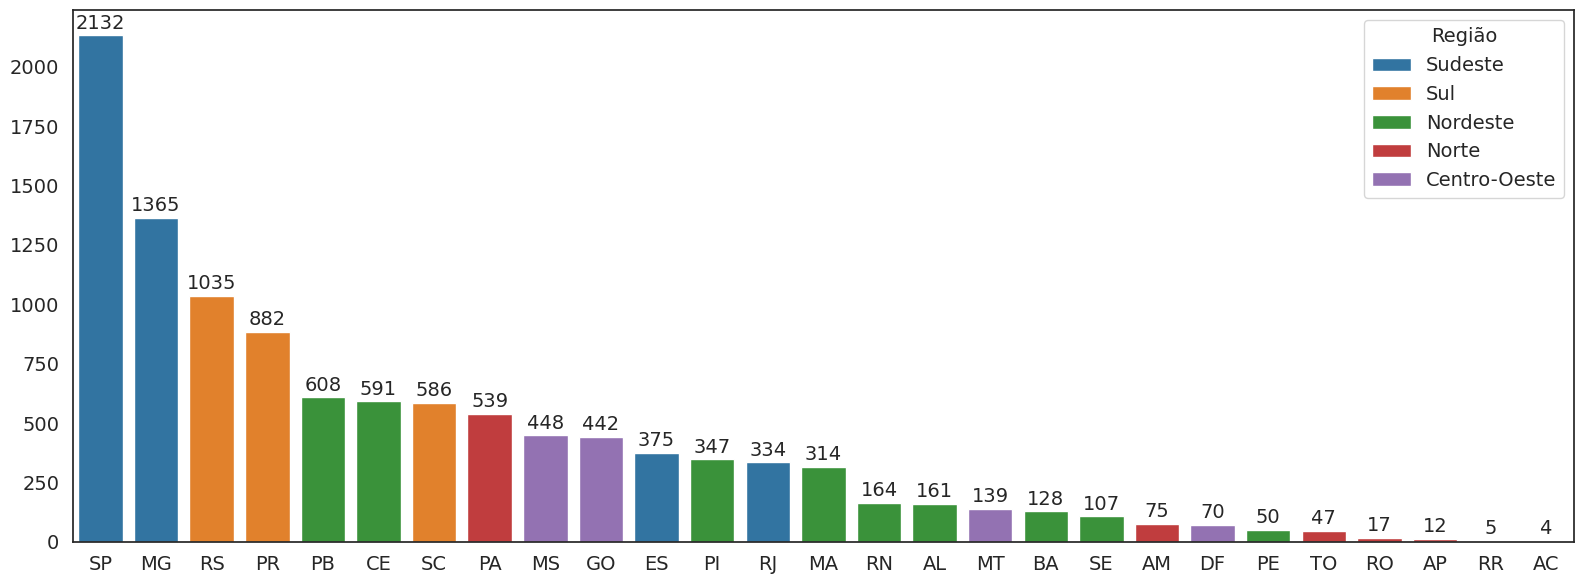

In [295]:
visualizacao.barplot_view(qtd_regiao_estado.sort_values(['counts'], ascending=False), 
                          x='estado', y='counts', hue='regiao', figsize=(16,6), dodge=False,title_legend="Região",
                          save_path='../imagens/qtd_região.pdf')

In [296]:
qtd_region_gender = dados_homologados_cp.groupby(['regiao', 'sexo']).size().reset_index(name='counts')

In [297]:
region_brazil = {'centro_oeste': 'Centro Oeste', 
                 'nordeste': 'Nordeste', 
                 'norte': 'Norte', 
                 'sudeste': 'Sudeste', 
                 'sul':'Sul'
                }
qtd_region_gender['regiao'] = qtd_region_gender['regiao'].replace(region_brazil)
qtd_region_gender['sexo'] = qtd_region_gender['sexo'].replace({'F': 'Feminino','M': 'Masculino'})

In [298]:
qtd_region_gender

,regiao,sexo,counts
0,Centro Oeste,Feminino,189
1,Centro Oeste,Masculino,910
2,Nordeste,Feminino,412
3,Nordeste,Masculino,2058
4,Norte,Feminino,141
5,Norte,Masculino,558
6,Sudeste,Feminino,746
7,Sudeste,Masculino,3460
8,Sul,Feminino,426
9,Sul,Masculino,2077


In [299]:
region_gender_percent = qtd_region_gender['counts'].to_numpy()
region_gender_percent = 100 * region_gender_percent/region_gender_percent.sum()
region_gender_percent = np.around(region_gender_percent, 2)

In [300]:
qtd_region_gender['Porcentagem regiao'] = region_gender_percent
qtd_region_gender.style.format({'Porcentagem regiao':'{:.2f}%'})

,regiao,sexo,counts,Porcentagem regiao
0,Centro Oeste,Feminino,189,1.72%
1,Centro Oeste,Masculino,910,8.29%
2,Nordeste,Feminino,412,3.75%
3,Nordeste,Masculino,2058,18.75%
4,Norte,Feminino,141,1.28%
5,Norte,Masculino,558,5.08%
6,Sudeste,Feminino,746,6.80%
7,Sudeste,Masculino,3460,31.52%
8,Sul,Feminino,426,3.88%
9,Sul,Masculino,2077,18.92%


In [301]:
qtd_region_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   regiao              10 non-null     object 
 1   sexo                10 non-null     object 
 2   counts              10 non-null     int64  
 3   Porcentagem regiao  10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


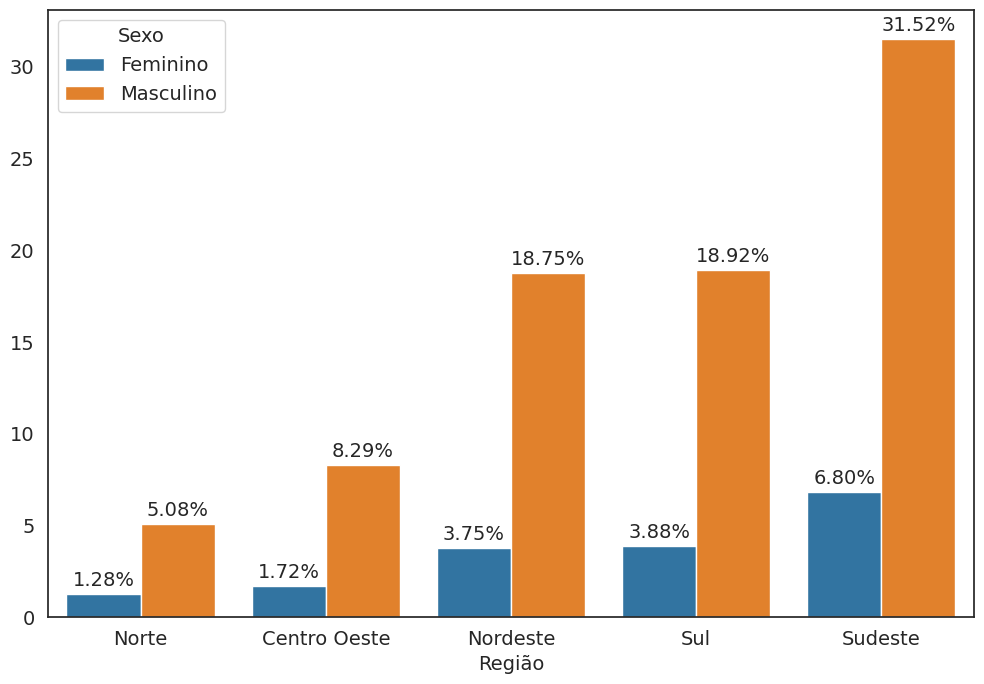

In [302]:
visualizacao.barplot_view_procents(qtd_region_gender.sort_values(['counts'], ascending=True), x='regiao', y='Porcentagem regiao', hue='sexo',
                            xlabel='Região', title_legend='Sexo', figsize=(10,7), save_path='../imagens/qtd_região.png')

In [303]:
qtd_region = dados_homologados_cp.copy()

In [304]:
qtd_region = qtd_region.groupby(['regiao']).size().reset_index(name='counts')

In [305]:
region_percent = qtd_region['counts'].to_numpy()
region_percent = 100 * region_percent/region_percent.sum()
region_percent = np.around(region_percent, 2)

In [306]:
qtd_region['Porcentagem regiao'] = region_percent
# qtd_region.style.format({'Porcentagem regiao':'{:.2f}%'})

In [307]:
qtd_region['regiao'] = qtd_region['regiao'].replace(region_brazil)

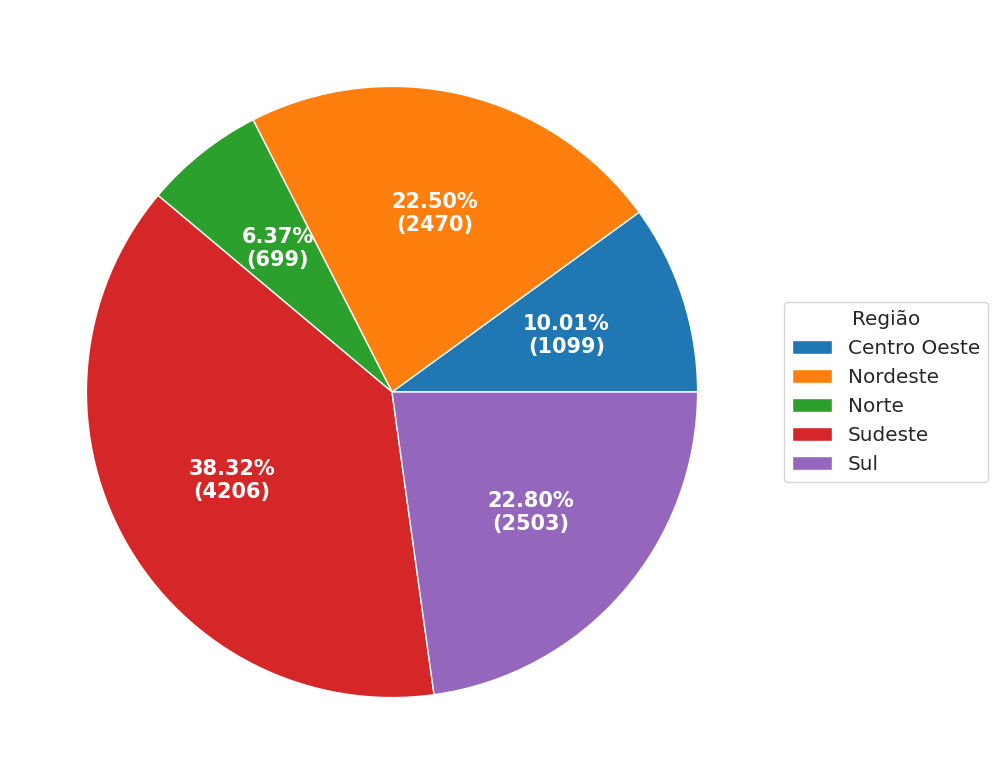

In [308]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.2f}%\n({absolute:d})"

fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

# Usar as informações do DataFrame
wedges, texts, autotexts = ax.pie(qtd_region['counts'], autopct=lambda pct: func(pct, qtd_region['counts']),
                                  textprops=dict(color="w"))

ax.legend(wedges, qtd_region['regiao'],
          title="Região",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize='large', title_fontsize='large')

plt.setp(autotexts, size=15, weight="bold")
plt.tight_layout()
plt.savefig('../imagens/pie.pdf', bbox_inches='tight', dpi=600, transparent=True)
plt.show()

### Converter as data de nascimento por idade

In [ ]:
from datetime import date

def calculate_age(row):
    birth_year = int(row['data nasc.'].split('/')[-1])  # Extrai o ano de nascimento a partir da data de nascimento
    exam_year = row['ano']  # Obtém o ano da realização da prova
    age = exam_year - birth_year
    return age

# Aplique a função calculate_age ao DataFrame para calcular as idades com base nos anos.
data_poscomp['idade'] = data_poscomp.apply(calculate_age, axis=1)

In [ ]:
data_poscomp = data_poscomp.drop(columns=['data nasc.'])

In [ ]:
data_poscomp['idade'].min()

In [ ]:
data_poscomp = data_poscomp[data_poscomp['idade'] >= 18]

In [ ]:
data_poscomp['idade'].value_counts(bins=10, sort=False)

In [ ]:
data_poscomp.duplicated().sum()

In [ ]:
data_poscomp.groupby('estado')[

## Adicionar os eixos e somar de cada candidato

In [ ]:
data_poscomp['matematica'] = data_poscomp.loc[:,['matemática discreta', 'cálculo diferencial e integral',
       'álgebra linear', 'geometria analítica', 'análise combinatória',
       'probabilidade e estatística', 'lógica matemática']].sum(axis=1)

In [ ]:
data_poscomp['fund_computacao'] = data_poscomp.loc[:,['organização de arquivos e dados', 'técnicas de programação',
       'circuitos digitais', 'análise de algoritmos', 'teoria dos grafos',
       'linguagens formais, autômatos e computabilidade',
       'algoritmos e estruturas de dados', 'linguagens de programação',
       'sistemas operacionais', 'arquitetura e organização de computadores',]].sum(axis=1)

In [ ]:
data_poscomp['tec_computacao'] = data_poscomp.loc[:,['redes de computadores', 'computação gráfica',
       'inteligência artificial', 'engenharia de software',
       'sistemas distribuídos', 'compiladores', 'processamento de imagens',
       'banco de dados']].sum(axis=1)

In [ ]:
data_poscomp['total'] = data_poscomp['matematica'] + data_poscomp['fund_computacao'] + data_poscomp['tec_computacao']

In [ ]:
axis_themes = data_poscomp.dropna()

In [ ]:
axis_themes

In [ ]:
axis_themes = axis_themes.loc[:, ['sexo','estado','regiao','matematica','fund_computacao','tec_computacao', 'total']]

In [ ]:
axis_themes.head()

In [ ]:
sns.boxplot( x=axis_themes["sexo"], y=axis_themes["matematica"] )

In [ ]:
# plotting both distibutions on the same figure
fig = sns.kdeplot(axis_themes['matematica'], shade=True, color="r")
fig = sns.kdeplot(axis_themes['fund_computacao'], shade=True, color="b")
fig = sns.kdeplot(axis_themes['tec_computacao'], shade=True, color="y")
plt.show()

In [ ]:
axis_themes

In [ ]:
group_sex = axis_themes.groupby(['estado', 'sexo']).agg({'matematica': ['count', 'mean'],
                                                        'fund_computacao':['count','mean']})

In [ ]:
group_sex = axis_themes.groupby(['estado', 'sexo']).agg(matematica_count= ('matematica', 'count'),
                                                       matematica_mean = ('matematica','mean'))

In [ ]:
group_sex

In [ ]:
group_sex.loc['AC']

In [ ]:
axis_themes['matematica'].plot(kind='hist')

In [ ]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=axis_themes, x="matematica", color="skyblue", ax=axs[0, 0],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="fund_computacao", color="olive", ax=axs[0, 1],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="tec_computacao", color="gold", ax=axs[1, 0],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="total", color="teal", ax=axs[1, 1],binwidth=3, hue='SEXO',multiple="stack")

plt.show()

In [ ]:
categorica = axis_themes.select_dtypes(include='O')

In [ ]:
colors = ['#F2AE55','#FF8A33','#E6835C','#FFAA9C','#F54A4A']

In [ ]:
plt.figure(figsize=(24,26))
for i, col in enumerate(categorica):
    axes = plt.subplot(5,2, i + 1)
    plt.pie(axis_themes[col].value_counts(), labels=axis_themes[col].value_counts().index,
            autopct='%.2f%%', shadow=True, startangle=90, colors=colors, textprops={'size':14})
plt.tight_layout()
plt.show()

In [ ]:
# O gráfico mostra que existem mais homens do que mulheres 
colunas = ['ESTADO','REGIAO', 'matematica', 'fund_computacao', 'tec_computacao']
plt.figure(figsize=(14,20))
for i,col in enumerate(colunas):
    axes = plt.subplot(4,2, i + 1)
    sns.countplot(x=axis_themes[col], hue=axis_themes['SEXO'], palette=colors, ax=axes)
    plt.xticks(rotation=60, fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
colunas = ['ESTADO','REGIAO']

# Barras
plt.figure(figsize=(14,27))
for i,col in enumerate(colunas):
    axes = plt.subplot(4,2, i + 1)
    sns.barplot(x=axis_themes[col],y=axis_themes['matematica'],hue=axis_themes['SEXO'],palette=colors, ci=None, ax=axes)
    plt.xticks(rotation=60, fontsize=14)
    plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
    plt.legend(loc='center')
    for cont in axes.containers:
        axes.bar_label(cont,fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
g = axis_themes.groupby('ESTADO')

In [ ]:
analise_estados = g.describe()['matematica']

In [ ]:
analise_estados = analise_estados.reset_index()

In [ ]:
lesr.estados
estados_invertido = {v: k for k, v in lesr.estados.items()}
estados_invertido

In [ ]:
analise_estados['ESTADO'] = analise_estados['ESTADO'].replace(lesr.estados)

In [ ]:
analise_estados

In [ ]:
imagens_por_estado = {
    'Acre': '../services/bandeiras/acre_image.png',
    'Alagoas': '../services/bandeiras/alagoas_image.png',
    'Amapá': '../services/bandeiras/Amapa_image.png',
    'Amazonas': '../services/bandeiras/amazona_image.png',
    'Bahia': '../services/bandeiras/bahia_image.png',
    'Ceará': '../services/bandeiras/ceara_image.png',
    'Distrito Federal': '../services/bandeiras/distrito_image.png',
    'Espírito Santo': '../services/bandeiras/esperitoSanto_image.png',
    'Goiás': '../services/bandeiras/goias_image.png',
    'Maranhão': '../services/bandeiras//maranhao_image.jpg',
    'Mato Grosso': '../services/bandeiras/matoGrosso_image.png',
    'Mato Grosso do Sul': '../services/bandeiras/matoSul_image.png',
    'Minas Gerais': '../services/bandeiras/minasGerais_image.png',
    'Pará': '../services/bandeiras/para_image.png',
    'Paraíba': '../services/bandeiras/paraiba_image.png',
    'Paraná': '../services/bandeiras/parana_image.png',
    'Pernambuco': '../services/bandeiras/pernambuco_image.png',
    'Piauí': '../services/bandeiras/piaui_image.png',
    'Rio de Janeiro': '../services/bandeiras/rioJaneiro_image.png',
    'Rio Grande do Norte': '../services/bandeiras/rioGrandeNorte_image.png',
    'Rio Grande do Sul': '../services/bandeiras/rioGrandeSul_image.png',
    'Rondônia': '../services/bandeiras/rondonia_image.png',
    'Roraima': '../services/bandeiras/roraima_image.png',
    'Santa Catarina': '../services/bandeiras/santaCatarina_image.png',
    'São Paulo': '../services/bandeiras/saoPaulo_image.png',
    'Sergipe': '../services/bandeiras/sergipe_image.png',
    'Tocantins': '../services/bandeiras/tocantins_image.png'
    # Adicione os demais estados
}

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Adicione a coluna 'Imagem' ao DataFrame com base no mapeamento
analise_estados['Imagem'] = analise_estados['ESTADO'].map(imagens_por_estado)

# Crie uma figura e eixos
fig, ax = plt.subplots(figsize=(15, 5))

zoom_level = 0.2

# Adicione bolhas para cada estado
for index, row in analise_estados.iterrows():
    estado = row['ESTADO']
    img_path = row['Imagem']
    mean_value = row['mean']

    img = plt.imread(img_path)
    img = OffsetImage(img, zoom=zoom_level)

    ab = AnnotationBbox(img, (index, 0), frameon=False, pad=0.0, xycoords='data', boxcoords='axes fraction')
    ax.add_artist(ab)

    # Adicione alturas das bolhas com base nas médias
    ax.annotate(f'Mean: {mean_value:.2f}', (index, 0), xytext=(index, mean_value),
                ha='center', va='bottom', fontsize=8, color='black')

# Ajuste dos limites dos eixos conforme necessário
ax.set_xlim(-1, len(analise_estados))
ax.set_ylim(0, analise_estados['mean'].max() + 1)  # Ajuste conforme necessário

# Adicione rótulos e título
ax.set_xlabel('Estados')
ax.set_ylabel('Média')  # Adicione um rótulo para o eixo y
ax.set_title('Bubble Plot dos Estados do Brasil com Médias')

# Remova os ticks do eixo y
ax.set_yticks([])

# Exiba o gráfico
plt.show()

In [ ]:
colunas_categoricas = ['SEXO', 'ESTADO', 'ESPECIALIDADE', 'PRESENTE DIA1', 'CARGO', 'REGIAO']

for coluna in colunas_categoricas:
    tem_interrigacao = data_poscomp[coluna].isna().any()
    if tem_interrigacao:
        print(f"Na coluna ' {coluna} existem valores '?'")

In [ ]:
for coluna in colunas_categoricas:
    data_poscomp[coluna] = data_poscomp[coluna].replace(' ?', np.nan)

# Tratamento da especilidade dos candidatos

In [ ]:
data_poscomp_esp = data_poscomp.query("ESPECIALIDADE.notnull()")

In [ ]:
data_poscomp_esp = data_poscomp_esp[data_poscomp_esp['PRESENTE DIA1'] != 'N']

In [ ]:
# Converter todos os elementos para minúsculas
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.lower()

In [ ]:
import re

# definir uma expressão regular para encontrar os caracteres '?'
def substituir_caracteres(df, caractere):
    regex = r'\b{}\b'.format(re.escape(caractere))

    # substituir os caracteres '?' por um caractere vazio em todas as linhas da coluna 'Texto'
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].apply(lambda x: re.sub(regex, '', x))
    
    return df

In [ ]:
def remover_e(frase):
    if frase.endswith(" e"):
        frase = frase.rstrip(" e")
    # if frase.endswith(" a"):
    #     frase = frase.rstrip(" a")
    return frase

# # Aplicar a função em uma coluna do DataFrame
# dados_disciplinas['ESPECIALIDADE'] = dados_disciplinas['ESPECIALIDADE'].apply(remover_e)

In [ ]:
def substituir_palavras(df, palavras_a_substituir, palavra_substituta):
    # Para cada palavra a ser substituída
    for palavra in palavras_a_substituir:
        # Use uma expressão regular para encontrar a palavra inteira e aplicar a substituição
        padrao = r'\b' + re.escape(palavra) + r'\b'
        df['ESPECIALIDADE'] = df['ESPECIALIDADE'].str.replace(padrao, palavra_substituta, regex=True)

    # Retorna o novo DataFrame com as palavras substituídas
    return df

In [ ]:
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '?')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '\\')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, ' \ ')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '\ ')

# Remover caracteres "\\"
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r'\\', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r' à', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r'.', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r':', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r',', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace('\xa0', '')

In [ ]:
# # buscando as três primeiras palavras de cada texto sem as vírgulas
# primeiras_palavras = data_poscomp['ESPECIALIDADE'].str.split().apply(lambda x: x[:3])

# # adicionando as palavras como uma nova coluna no dataframe
# data_poscomp['ESPECIALIDADE'] = primeiras_palavras

# # removendo as vírgulas da coluna 'Primeiras Palavras'
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(lambda x: ' '.join(word.replace(',', '') for word in x))

# # imprimindo o dataframe resultante

In [ ]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(remover_e)

### Junção das especialidades

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'inteligência computacional e processamento gráfico',
'inteligência computacional',
'inteligência artificial e banco de dados',
'otimização e inteligência artificial',
'lógica inteligência artificial e métodos formais',
'inteligência aplicada',
 'inteligencia computacional',
 'inteligencia artificial',
 'inteligência e modelagem computacional',
'matemática e inteligência artificial',
 'outrasinteligência artificial',
'redes neurais e computação gráfica',
 'sistemas nebulosos e redes neurais artificiais',
'redes neuronais artificiais',
], 'inteligência artificial')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'engenharia de software',
 'engenharia de software técnicas de reúso testes e qualidade',
 'engenharia de software banco de dados e informática e educação',
 'engenharia de software e banco de dados',
 'engenharia de software e redes de computadores',
 'engenharia de software e sistemas de informação',
 'engenharia de software e linguagens de programação',
 'engenharia de software e usabilidade',
 'engenharia de software banco de dados e interação humano computador',
 'engenharia de software e sistemas de informação/sistemas web e multimídia interativos',
 'engenharia de software e sistemas de computação',
 'engenharia de software experimental',
 'engenharia de software gerenciamento de informações e interfaces homem-computador',
 'engenharia de software e linguagens de programacao',
 'engenharia de software e sistemas computacionais',
 'engenharia de software e sistemas de informação / sistemas web e multimídia interativos',
 'engenharia de software baseada em buscas',
 'engenharia de software e linguagens de programacão',
 'engenharia de software/sistemas web e multimídia interativos',
 'engenharia de software / sistemas web e multimídia interativos',
'otimização em engenharia de software',
 'agentes de software e ontologias aplicadas engenharia de software',
                                                 'qualidade de software',
'engenharia  de software',
'verificação e teste de software',
 'avaliação e melhoria de processos de software',
 'processo de desenvolvimento de software visando a usabilidade',
 'processos de desenvolvimento de software',
 'controle da engenharia de software',
 'ambientes de desenvolvimento de software',
 'métricas de software e gerência de projetos',
 'gerência de projetos de desenvolvimento de software',
 'melhoria de processo de software',
 'projetos integrados de software e hardware',
 'teste de software',
'desenvolvimento dirigido a modelos mdd - model-driven development',
 'desenvolvimento de ferramentas de gerência e administracão',
'métodos ágeis'], 'engenharia de software')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas de computação',
 'sistemas de computaçãoredes de computadores',
 'sistemas de computaçãomicroeletrônica e processamento de sinais',
 'sistemas de computaçãoredes e sistemas distribuídos',
 'sistemas de computaçãosistemas inteligentes',
 'sistemas de computaçãoarquitetura de sistemas de computação  e sistemas operacionais',
 'sistemas de computaçãovisualização e interação',
 'sistemas de computaçãoarquitetura de sistemas de computação e sistemas operacionais',
 'sistemas de computaçãocomputação aplicada',
    'sistemas computacionais complexos',
'sistema de computação',
'análise e modelagem de desempenho em sistemas de computação',
 'escalabilidade e eficiência em sistemas de computação',
 'tecnologias e sistemas de computação',
 'analise de desempenho de sistemas de computação',
'sistemas computacionais para bioinformática',
 'sistemas complexos de partículas e teoria de controle',
 'sistemas computacionais',
 'sistemas computacionais embarcados',
 'sistemas complexos adaptativos',
'engenharia de sistemas de computação',
'engenharia desistemascomputacionais',
 'engenharia de sistema e computação',
 'engenharia de sistemas',
'sistemas de computação e informação',
 'sistemas de computação embarcados',
 'segurança em sistemas de computação',
 'sistemas de computação web',
 'projeto de sistemas de computação',
 'controle de sistemas de computação',
'sistemas e tecnologias da computação',
'ciência computacional',
 'ciência da computação',
'ciências de computação'], 'sistemas de computação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas de informação',
 'sistemas de informação e computação',
 'sistemas de informação para a web',
 'sistemas de informação e banco de dados',
 'sistemas de informação e processamento gráfico',
 'sistemas de informações multimídia',
 'sistemas de informação geográfica e geoprocessamento',
'sistema de informação',
'modelagem e gerência de sistemas de informação',
 'gerência de desenvolvimento de sistemas de informação',
 'desenvolvimento de sistemas de informação',
 'alinhamento estratégico de tecnologias e sistemas de informação',
'gestão estratégica de ti',
 'gestão de riscos',
 'gestão do conhecimento',
 'gestão de sistemas complexos',
 'sistemas de gestão empresarial',
 'gestão da informação',
 'gestão de processos de negócios',
], 'sistemas de informação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação aplicada',
 'computação aplicada a biociências',
 'computação aplicadasistemas de computação',
 'computação aplicadasistemas de informação',
 'computação aplicadainteligência computacional',
'computação científica e aplicada'], 'computação aplicada')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'redes de computadores',
 'redes de computadores e sistemas distribuídos',
 'redes de computadores e telecomunicações',
 'redes de computadores e comunicação de dados',
 'redes de computadores e sistemas distribuidos',
 'redes de computadores  e sistemas embarcados',
 'redes de comunicação e sistemas distribuídos',
 'redes de computadores e de telecomunicações',
 'redes de computadores e sistemas embarcados',
 'redes de comunicação',
 'redes de comunicações',
'gerenciamento de redes de computadores',
'redes e sistemas distribuídos',
 'redes de sensores sem fio',
'gerência de redes',
 'gerenciamento de redes',
'segurança em redes',
 'engenharia de tráfego em redes ópticas',
 'segurança de redes',
 'redes e sistemas distribuídos',
 'projeto de redes e segurança de dados',
 'sistemas distribuídos e redes de computadores',
 'sistemas distribuídos e  visão computacional',
 'sistemas distribuídos e programação concorrente',
 'sistemas distribuídos e programação concorrente/sistemas embarcados',
 'sistemas distribuídos e computação de alto desempenho',
 'sistemas distribuídos e programação concorrente / sistemas embarcados',
'sistemas distribuídos/sistemas embarcados',
 'sistemas distribuídos / sistemas embarcados',
'computação distribuida',
 'computação distribuída',
'desenvolvimento de software distribuído',
 'técnicas de modelagem de sistemas distribuídos',
 'segurança e sistemas distribuídos',
 'middleware e objetos distribuídos',
 'algoritmos distribuídos',
'distribuição e redes',
 'aplicações distribuídas',
'sistemas distribuídos',
 'redes de computadores/sistemas embarcados',
 'redes e sistemas distribuidos',
 'redes móveis',
 'redes de computadores / sistemas embarcados',
'redes de computadores evoluídos e robóticos',
'projeto e teste de circuitos digitais', 'projeto de sistemas e circuitos',
'internet e web das coisas',
 'desenvolvimento de plataformas para iot (internet das coisas)',
 'serviços internet escaláveis e eficientes',
'computação em nuvem',
'cloud computing',
'sistemas web e multimídia interativos',
 'hipertexto e multimídia',
 'multimídia e processamento digital de sinais',
 'hipermídia e multimídia',
'computação ubíqua e pervasiva', 'computação móvel e ubíqua'], 'redes de computadores')

In [ ]:
data_poscomp_esp = data_poscomp_esp.replace(to_replace={'redes':'redes de computadores',
                                                       'desenvolvimento de plataformas para iot (internet das coisas)':'redes de computadores'},
                                                inplace=False)

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas embarcados e engenharia de software',
 'sistemas embarcados',
 'sistemas embarcados evoluídos e robóticos',
 'sistemas embarcados e sistemas digitais',
 'sistemas embarcados e robótica',
'sistemas digitais e embarcados',
 'velha-sistemas embarcados'], 'sistemas embarcados')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas inteligentes',
 'sistemas inteligentes e lógica',
 'sistemas integrados e distribuidos',
 'sistemas interativos e de informação',
 'sistemas integrados e distribuídos',
 'sistemas integrados de hardware e software',
'computação inteligente',
 'teste e confiabilidade de sistemas inteligentes',
 'computação inteligente aplicada a mercados financeiros',
 'computação pervasiva sistemas inteligentes',
 'agentes inteligentes e representacao do conhecimento',
 'aprendizado de máquina e sistemas inteligentes',
'sistemas inteligentes aplicada a mercados financeiros'], 'sistemas inteligentes')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'banco de dados',
 'banco de dados e engenharia de software',
 'banco de dados na web e distribuídos',
 'banco de dados e recuperação de informação',
 'banco de dados e imagens',
 'banco de dados/computação gráfica imagens e visualização',
 'banco de dados e web',
 'banco de dados / computação gráfica imagens e visualização',
'bancos de dados', 'bancos de dados e imagens',
'banco de dados e imagens',
 'web e banco de dados',
 'novos algoritmos e arquiteturas para banco de dados espaciais distribuídos',
 'projeto de banco de dados',
'modelagem conceitual e banco de dados',
'gerenciamento de dados e informações',
'gerência de dados distribuidos web clusters e grids',
 'gerência de dados da web',
'gerência de dados e aplicações',
 'métodos baseados em dados',
 'inferência em dados complexos',
 'gerenciamento de dados semi-estruturados'], 'banco de dados')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação visual e inteligente',
 'computação visual',
 'computação visual e sistemas inteligentes',
 'computação visual e inteligência artificial'], 'computação visual')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'aprendizado de máquina e mineração de dados',
 'aprendizado de máquina',
 'aprendizado de máquina e processamento de línguas naturais',
 'aprendizado de maquina e interação',
'aprendizagem de máquina',
 'aprendizagem de máquina e mineração',
 'aprendizagem de maquina e mineracao',
 'aprendizagem de máquina e sistemas inteligentes',
 'aprendizagem de máquina e mineracão',
'descoberta do conhecimento e aprendizado de máquina',
'mineração de dados',
 'mineração análise e visualização de dados',
 'mineração de dados e descoberta de conhecimento',
'mineiração de dados',
'aprendizado de máquina e mineração',
 'aprendizagem e otimização',
 'aprendizado automático de modelos',
 'aprendizado de máquina e descoberta de conhecimento',
 'aprendizado de máquina e mineracão',
'reconhecimento de padrões',
 'reconhecimento de padrões e processamento de sinais',
 'reconhecimento de padroes e processamento de sinais',
'aprendizado de máquina e processamento de sinais',
'visualização de informações',
 'visualização da informação',
'aprendizado de máquina e sistemas inteligentes'], 'aprendizado de máquina')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    ], 'ciência computacional')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'ciência de dados',
 'ciência de dados e engenharia de software',
 'ciência dos dados','data science',
'análise de padrões em dados',
 'análise de padrões',
 'análise de redes sociais',
 'análise de dados descoberta de conhecimento e recuperação de informação',
'análise de dados'], 'ciência de dados')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'arquitetura de computadores e compiladores',
 'arquitetura de sistemas computacionais',
 'arquitetura e projeto de sistemas computacionais',
 'arquitetura de computadores e sistemas distribuídos',
 'arquitetura de computadores e sistemas digitais',
 'arquiteturas e algoritmos para máquinas paralelas e distribuídas',
 'arquitetura de computadores compiladores e design de hardware',
 'arquiteturas e redes de computadores',
'arquitetura de sistemas de computação',
 'arquitetura e sistemas de computação',
'arquitetura de computadores e redes de computadores',
 'arquitetura de computadores e sistemas distribuidos'], 'arquitetura de computadores',)

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'otimização e inteligência artificial',
 'otimização',
 'otimização e raciocínio automático',
 'otimização e automação de sistemas',
 'otimização combinatória',
'mecânica dos fluidos computacional',
 'mecânica dos fluidos computacional/otimização/modelos estocásticos',
 'mecânica dos fluidos computacional / otimização / modelos estocásticos',
'otimização/otimização/modelos estocásticos',
 'otimização / otimização / modelos estocásticos',
'algoritmos e grafos',
 'algoritmos otimização e teoria da computação',
 'algoritmos e otimização',
'algoritmos grafos e combinatória',
 'algoritmos otimização e complexidade computacional',
'métodos computacionais de otimização (interdepartamental)',
 'métodos numéricos e otimização',
 'heurísticas e meta-heurísticas otimização (programação linear não linear e inteira)',
 'sistemas de otimização',
 'métodos computacionais de otimização',
 'computacao evolucionaria aprendizagem e otimizacao',
 'técnicas heurísticas e metaheurísticas para otimização',
 'algoritimos otimização e teoria da computação',
 'computacão evolucionária aprendizagem e otimizacão',
'otimização (interdepartamental)',
 'heurísticas e meta-heurísticas otimização (programação linear não linear e inteira)',
'combinatória e teoria da computação',
 'algoritmos e combinatória',
 'grafos e combinatória',
 'outrasalgoritmos e combinatória',
 'matemática discreta e combinatória'], 'otimização',)

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'teoria da computação',
 'teoria e algoritmos em grafos',
 'teoria lógica e métodos formais',
 'teoria aplicada computação',
 'teoria dos grafos e combinatória',
 'teoria dos grafos',
 'teoria da computaçãoanálise de algoritmos e complexidade de computação_x000d_otimização',
    'linguagens formais e autômatos',
    'algoritmos e complexidade computacional'
], 'teoria da computação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'metodologia e técnicas da computação',
 'metodologia e técnicas de computação',
 'metodologia da computação',
 'metodologias e técnicas de computação',
 'metodologia e técnicas de programação',
 'metodologia e tecnicas de computação',
 'metodologia e técnicas da computaçãoengenharia de software',
 'metodologia e técnicas da computaçãolinguagens de programação',
 'metodologia e técnicas da computaçãobanco de dadosengenharia de dados e conhecimento',
 'metodologia e técnicas da computaçãocomputação gráfica processamento de imagens e visão computacional',
 'metodologia e técnicas da computaçãobanco de dados',
 'metodologia e técnicas da computaçãoengenharia de softwarefábrica de software',
'fundamentos e métodos de computação',
'fundamentos da computação',
 'fundamentos de computação',
 'fundamentos matemáticos da computação',
 'fundamentos matemáticos da computacão'], 'metodologias e técnicas de computação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação gráfica imagens e visualização',
 'computação gráfica',
 'computação gráfica processamento de imagens e interação',
 'computação gráfica processamento de imagens realidade virtual e interação humano computador',
 'computação gráfica e processamento de imagens'], 'computação gráfica')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'tecnologias aplicadas educação e saúde',
 'informática na educação',
 'informática educação e sociedade',
 'educação em engenharia de software',
 'informática e educação',
 'inovações tecnológicas para apoiar a educação',
'tecnologias educacionais e assistivas',
 'elaboração de software educativo e objetos de aprendizagem',
 'tecnologias educacionais',
'métodos e recursos para o ensino de ciências e tecnologia'], 'informática na educação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'bioinformática',
 'bioinformática estrutural',
 'biometria',
 'bioinformática e computação bioinspirada',
 'bioinformática e biologia computacional',
 'biologia matemática e computacional',
 'biologia computacional'], 'bioinformática')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'robótica móvel',
 'robótica',
 'robótica cooperativa',
 'robótica e automação inteligentes',
 'robótica coletiva',
 'robótica visão computacional e processamento gráfico',
'automação e robótica'], 'robótica')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'modelagem computacional',
 'modelagem computacional do sistema solo-planta-animal',
 'modelagem e simulação de sistemas',
 'modelagem de negócios',
 'modelagem matemático computacional e simulação',
 'modelagem e métodos computacionais',
 'modelagem e simulação',
 'modelagem conceitual',
 'modelagem e arquitetura',
 'modelagem de dados',
'modelos e arquiteturas para sistemas inteligentes',
 'modelos computacionais e cognitivos'], 'modelagem computacional')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'linguagens de programação e banco de dados',
 'linguagens de programação',
 'linguagem de programação e métodos formais',
 'linguagens e ambientes de programação',
 'linguagens de programação e sistemas de tipos',
 'linguagens de programação e métodos formais',
'algoritimos experimentais', 
    'algoritmos experimentais',
], 'linguagens de programação')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'visão computacional',
 'visão computacional reconhecimento de padrões e computação forense',
 'visão e robótica',
 'visão computacional e robótica',
 'visão computacional realidade virtual e aumentada',
'processamento de imagens',
 'processamento de imagens e visão computacional',
 'processamento de imagens e sinais algoritmos e arquiteturas',
 'processamento de imagens e sinais',
'processamento gráfico',
 'processamento gráfico interação e computação aplicada',
 'processamento gráfico e inteligência artificial',
 'processamento gráfico aplicado',
 'processamento grafico',
'visão computacional aprendizado de máquina e computação forense',
 'visão computacional interação e computação aplicada',
 'visão computacional e visão computacional',
 'visão computacional e inteligência artificial',
 'visão computacional e sinais algoritmos e arquiteturas',
 'visão computacional aplicado',
 'visão computacional e sinais',
'visao computacional realidade virtual e aumentada',
'visão computacional linguagens de programação e arquiteturas'], 'visão computacional')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'tecnologias computacionais para agricultura e pecuária',
 'agropecuária de precisão',
 'desenvolvimento e aplicação de tecnologias computacionais em sistemas agrícolas e de pecuária',
'aplicações da computação'], 'aplicações computacionais')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'computação paralela e distribuída',
    'sistemas paralelos e distribuídos',
 'algoritmos paralelos e distribuídos'
],'processamento paralelo e distribuído')

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
  'tecnologia da informação para grandes coorporações',
 'gestão da tecnologia da informação'
],'tecnologia da informação',)

In [ ]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
  'interfaces humano-computador',
 'interação humano-computador',
 'realidade virtual e interação humano computador',
 'interface humano-computador',
'design de artefatos digitais'],'interação humano-computador',)

In [ ]:
f = data_poscomp_esp[data_poscomp_esp['ESPECIALIDADE'].str.contains('aplica')]
print(f['ESPECIALIDADE'].sort_values().value_counts())
list(f['ESPECIALIDADE'].unique())

In [ ]:
especialidades = data_poscomp_esp['ESPECIALIDADE'].value_counts()
especialidades = pd.DataFrame(especialidades)
especialidades.head(60)

In [ ]:
# Supondo que 'data_poscomp_esp' seja o seu DataFrame
qtd = data_poscomp_esp.groupby(['ESPECIALIDADE', 'ESTADO']).size().reset_index(name='counts')

In [ ]:
# Encontre a especialidade predominante para cada estado
idx = qtd.groupby(['ESTADO'])['counts'].transform(max) == qtd['counts']
result_df = qtd[idx]

In [ ]:
visualizacao.barplot_view(result_df.sort_values(['counts'], ascending=False), 
                          x='ESTADO', y='counts', hue='ESPECIALIDADE', figsize=(12,6), dodge=False,
                         save_path='../imagens/especialidades_estados.pdf', title_legend='Linhas de Pesquisas', ylabel="Quantidades",
                         xlabel="Estados")

#### Pegar as mais predominantes

In [ ]:
df = data_poscomp_esp.copy()

contagem_valores = df['ESPECIALIDADE'].value_counts()

# Identifica valores que ocorrem menos de 100 vezes
valores_a_renomear = contagem_valores[contagem_valores <= 109].index

# Define o novo valor (categoria) para as áreas com contagem menor que 100
novo_valor = 'Demais áreas'

# Renomeia as áreas com contagem menor que 100 para 'Outras Áreas'
df.loc[df['ESPECIALIDADE'].isin(valores_a_renomear), 'ESPECIALIDADE'] = novo_valor

# Agora, as áreas com contagem menor que 100 foram renomeadas para 'Outras Áreas'
df.ESPECIALIDADE.value_counts()

In [316]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# plt.figure(figsize=(14, 10))

# # plot a bar chart
# sns.barplot(
#     y="ESPECIALIDADE", 
#     x=especialidades.index, 
#     data=especialidades, 
#     color='#69b3a2', 
# );
# plt.xticks(rotation=45);
# # plt.savefig('espec.png', dpi = 300, bbox_inches='tight')

In [ ]:
# # Libraries
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt
# import string

# text = data_poscomp['ESPECIALIDADE'].value_counts()
# text = text.to_dict()

# stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

# # Create the wordcloud object
# wordcloud2 = WordCloud(background_color="white",
#                        # random_state=1, 
#                        min_word_length=3,
#                         width=4000, height=2000,
#                         stopwords=stopwords
#                        ).generate_from_frequencies(text)
# # WordCloud.generate_from_frequencies

# # Display the generated image:
# plt.imshow(wordcloud2, interpolation="bilinear")
# plt.axis("off")
# # plt.margins(x=0, y=0)
# plt.savefig('imagens/nuvem_palavras.eps', format='eps', dpi = 300, bbox_inches='tight')
# plt.show()

In [ ]:
# import pandas as pd

# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Ordena os dados por estado e contagem em ordem decrescente
# contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()

# # Exibe o resultado
# print(areas_mais_frequentes)

In [ ]:
# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.sort_values('CONTAGEM', ascending=False).drop_duplicates('ESTADO')

# # Ordena os dados por contagem em ordem decrescente
# areas_mais_frequentes = areas_mais_frequentes.sort_values('CONTAGEM', ascending=False)

# # Plota o gráfico de barras
# plt.figure(figsize=(14, 7))
# ax = sns.barplot(data=areas_mais_frequentes, x='ESTADO', y='CONTAGEM', hue='ESPECIALIDADE',dodge=False )

# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 1),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=18)

# ax.set_xlabel('Unidade Federativas', fontsize=18)
# ax.set_ylabel('Contagem', fontsize=18)
# # ax.set_title('Área mais Frequente por Estado', fontsize=16)
# ax.tick_params(axis='x', labelsize=18)
# ax.tick_params(axis='y', labelsize=18)
# legend = plt.legend(title='Linhas de pesquisas', fontsize=16, loc='upper right')
# legend.get_title().set_fontsize(18)
# plt.tight_layout()
# plt.savefig('imagens/especialidade_frequenteEstado.eps', format='eps', dpi = 600, bbox_inches='tight')
# plt.show()

In [ ]:
# plt.figure(figsize=(18,10))
# sns.set_style(style='ticks')
# ax = sns.barplot(data=areas_mais_frequentes.sort_values(['candidatos'], ascending=False),
#             y='candidatos',
#             x='ESTADO',
#             hue='REGIAO',
#             dodge=False,
#             # color='hsv'
#            )
# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 5),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=16)
# plt.xlabel('Unidade Federativa', fontsize=18)
# plt.ylabel('Quantidade de participantes', fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# legend = plt.legend(title='Região', fontsize=16)
# legend.get_title().set_fontsize(18)
# # plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
# plt.show()

## Salvar os dados

In [ ]:
# df.to_csv('../dados/dataset_poscomp.csv', index=False)